In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# create the crl figures

# get data
crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"
file_name = "P3_20210927H1_213003-253558.cdf"

os.chdir( crl_path)
crl_data = xr.open_dataset( file_name)

# crl_data

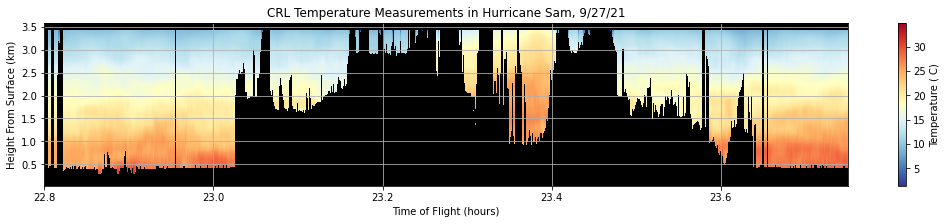

In [3]:
# plot temperature figure
fig = plt.figure( figsize=(18, 3))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.pcolormesh( crl_data.time, - crl_data.H, crl_data.T.where( crl_data.T.values < 50).transpose(), cmap = color_map ) 
plt.title( 'CRL Temperature Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Time of Flight (hours)')
plt.xlim( [ 22.8, 23.75 ])
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")
# fig.tight_layout()
plt.show()

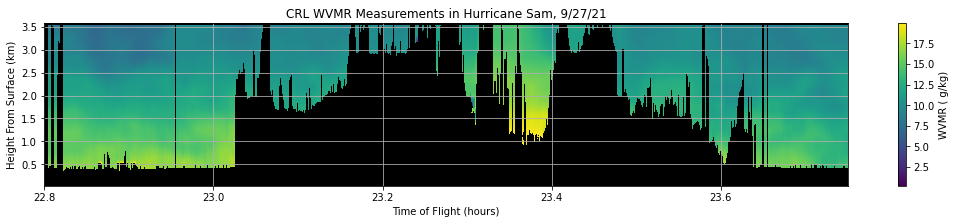

In [4]:
# plot wvmr figure
fig = plt.figure( figsize=(18, 3))
# color_map = plt.cm.get_cmap( "seismic")

# step1 = crl_data.P_ch1.where( crl_data.P_ch1.values > -50)
# step2 = step1.where( crl_data.P_ch1.values < 0)

step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)

plt.pcolormesh( crl_data.time, - crl_data.H, step2.transpose() ) #, cmap = color_map )  
plt.title( 'CRL WVMR Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Time of Flight (hours)')
plt.xlim( [22.8, 23.75 ])
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="WVMR ( g/kg)")
plt.show()


In [ ]:
# plot wvmr figure
fig = plt.figure( figsize=(18, 3))
# color_map = plt.cm.get_cmap( "seismic")

# step1 = crl_data.P_ch1.where( crl_data.P_ch1.values > -50)
# step2 = step1.where( crl_data.P_ch1.values < 0)

step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
step2 = step1.where( step1.values < 20)

plt.pcolormesh( crl_data.time, - crl_data.H, step2.transpose() ) #, cmap = color_map )  
plt.title( 'CRL WVMR Measurements in Hurricane Sam, 9/27/21')
plt.ylabel( 'Height From Surface (km)')
plt.xlabel( 'Time of Flight (hours)')
plt.xlim( [22.8, 23.75 ])
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="WVMR ( g/kg)")
plt.show()


In [40]:
# Plot TDR 

# get data
tdr_path = "/Users/etmu9498/Desktop/research/sam-tdr/nc-files"
os.chdir( tdr_path)

inbound_name = "210927H1_2205_vert_inbound.nc"
outbound_name = "210927H1_2205_vert_outbound.nc"
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

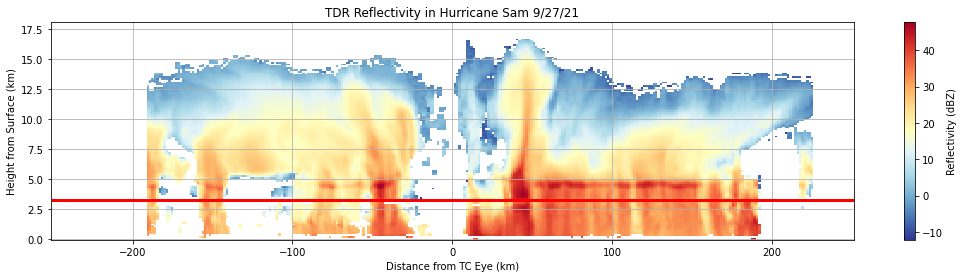

In [59]:
# make TDR figure

# find the highest altitude and use that as the max y height
alt_in = inbound_data.variables['altitude']
max_alt_in = alt_in.max().values

alt_out = outbound_data.variables['altitude']
max_alt_out = alt_out.max().values

fig = plt.figure( figsize=(18, 4))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

# plot outbound data
xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
plt.plot( -xvals, yvals, color='red', linewidth=3)                             
plt.pcolormesh( -outbound_data.radius, outbound_data.height, outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )

# Plot inbound data
# make a red line through the plot to show flight height
xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
plt.plot( xvals, yvals, color='red', linewidth=3)
                             
plt.pcolormesh( inbound_data.radius, inbound_data.height, inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'TDR Reflectivity in Hurricane Sam 9/27/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Distance from TC Eye (km)')
plt.grid( 'on')